# Jupyter Notebook: Parsing CSV and Visualizing Data

In this notebook, we will load a CSV file, convert it to a pandas DataFrame, and then create visualizations using seaborn.

In [10]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [11]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import seaborn as sns  # for visualization

## Step 1: Load CSV File and Parse Data

In [12]:
# Load the CSV file into a pandas DataFrame
file_path = 'APCD-Pueblo-PM10.csv'  # Update with actual path to the file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
df.head()

,date,min,max,median,q1,q3,stdev,count
0,2021-09-07T00:00:00.000Z,23.2,61.4,38.54,30.90,49.4,10.940,318
1,2021-09-08T00:00:00.000Z,44.8,58.5,54.60,51.05,55.8,3.149,584
2,2021-09-09T00:00:00.000Z,25.6,54.9,47.70,41.60,50.7,7.837,574
3,2021-09-10T00:00:00.000Z,17.9,47.4,37.10,29.40,41.5,7.327,591
4,2021-09-11T00:00:00.000Z,10.1,54.9,44.10,15.90,49.3,16.129,639


## Step 2: Locate the Date, Min, Max, and Median Data

In [13]:
# Select relevant columns: date, min, max, median
date_min_max_median_df = df[['date', 'min', 'max', 'median']]

# Display the first few rows of the selected data
date_min_max_median_df.head(10)

,date,min,max,median
0,2021-09-07T00:00:00.000Z,23.2,61.4,38.54
1,2021-09-08T00:00:00.000Z,44.8,58.5,54.60
2,2021-09-09T00:00:00.000Z,25.6,54.9,47.70
3,2021-09-10T00:00:00.000Z,17.9,47.4,37.10
4,2021-09-11T00:00:00.000Z,10.1,54.9,44.10
5,2021-09-12T00:00:00.000Z,7.0,25.9,10.95
6,2021-09-13T00:00:00.000Z,1.8,20.1,6.40
7,2021-09-14T00:00:00.000Z,0.7,9.9,2.90
8,2021-09-15T00:00:00.000Z,2.9,18.7,7.30
9,2021-09-16T00:00:00.000Z,2.0,14.7,5.00


## Step 3: Calculate Summary Statistics

In [14]:
# Calculate summary statistics for min, max, and median columns
summary_stats = date_min_max_median_df[['min', 'max', 'median']].describe()

# Display the summary statistics
summary_stats

,min,max,median
count,895.000000,895.000000,895.000000
mean,70.295754,96.271844,75.614302
std,2050.415173,2049.835491,2050.249829
min,0.000000,3.100000,0.100000
25%,0.100000,12.800000,2.900000
50%,0.700000,20.400000,5.090000
75%,2.000000,34.450000,8.400000
max,61343.000000,61343.000000,61343.000000


## Step 4: Visualize the Data with Seaborn

<ipython-input-15-1d2544d07d4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])


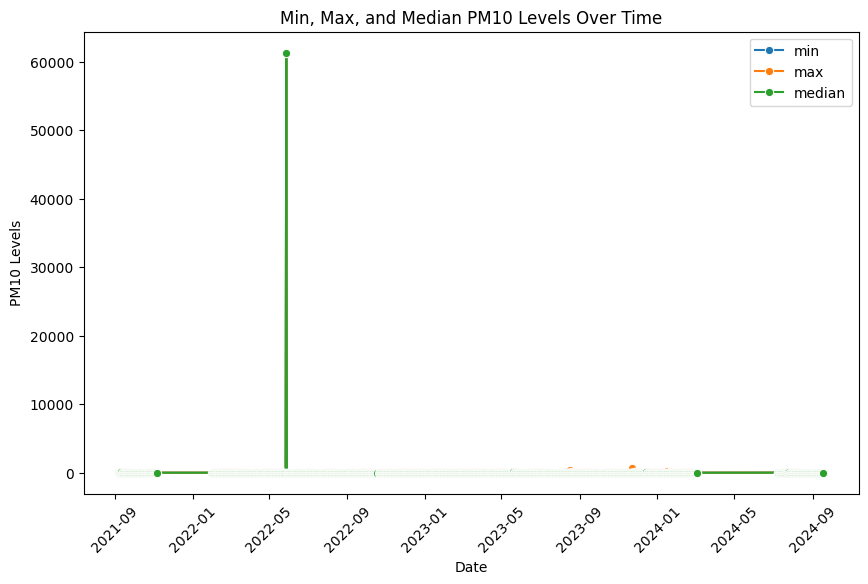

In [15]:
# Convert the Date column to datetime format
date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])

# Plot the Min, Max, and Median values over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='min', data=date_min_max_median_df, marker='o', label='min')
sns.lineplot(x='date', y='max', data=date_min_max_median_df, marker='o', label='max')
sns.lineplot(x='date', y='median', data=date_min_max_median_df, marker='o', label='median')
plt.title('Min, Max, and Median PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM10 Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

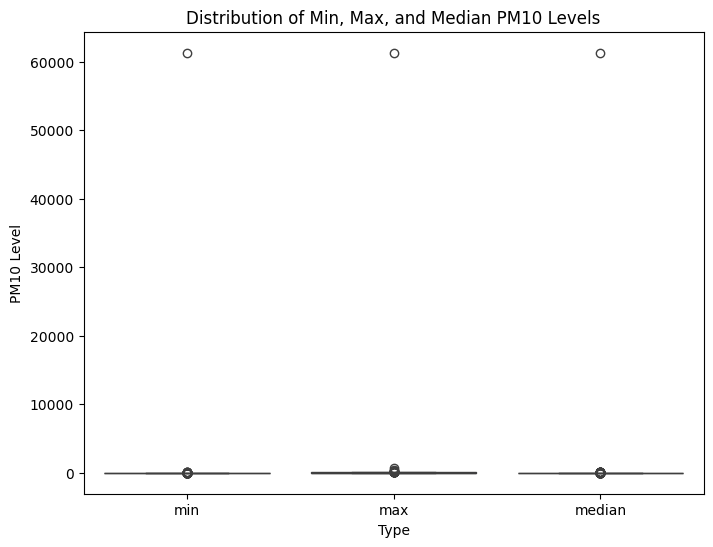

In [16]:
# Melt the data for easier plotting with seaborn
melted_df = date_min_max_median_df.melt(id_vars='date', value_vars=['min', 'max', 'median'], var_name='Type', value_name='PM10 Level')

# Create a box plot for Min, Max, and Median values
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='PM10 Level', data=melted_df)
plt.title('Distribution of Min, Max, and Median PM10 Levels')
plt.xlabel('Type')
plt.ylabel('PM10 Level')
plt.show()